# Тема “Обучение без учителя”

Импорт библиотек pandas, numpy и matplotlib.

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Загрузка учебного датасета  "Boston House Prices dataset" из библиотеки sklearn

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [14]:
from sklearn.datasets import load_boston
boston = load_boston()

  
Постройте модель TSNE на тренировочный данных с параметрами:  
n_components=2, learning_rate=250, random_state=42.  
Постройте диаграмму рассеяния на этих данных.  


Создайте датафреймы X и y из этих данных.

In [19]:
data = boston["data"]
feature_names = boston["feature_names"]
target = boston["target"]

In [18]:
X = pd.DataFrame(data, columns=feature_names)

X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [21]:
y = pd.DataFrame(target, columns=["price"])

y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   506 non-null    float64
dtypes: float64(1)
memory usage: 4.1 KB


Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)  
с помощью функции train_test_split так, чтобы размер тестовой выборки  
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

Масштабируйте данные с помощью StandardScaler. 

In [30]:
scaler = StandardScaler(with_mean=False)

#X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train))
X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test))
#y_train_scaled = pd.DataFrame(scaler.fit_transform(y_train))
#y_test_scaled = pd.DataFrame(scaler.fit_transform(y_test))

Постройте модель TSNE на тренировочный данных с параметрами:  
n_components=2, learning_rate=250, random_state=42.  
Постройте диаграмму рассеяния на этих данных.  

In [32]:
tsne = TSNE(n_components=2, learning_rate=150, random_state=100)

X_train_tsne = tsne.fit_transform(X_train_scaled)

print('До:\t{}'.format(X_train_scaled.shape))
print('После:\t{}'.format(X_train_tsne.shape))

До:	(404, 13)
После:	(404, 2)


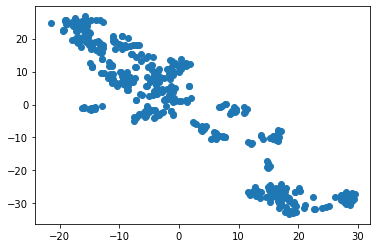

In [35]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

plt.show()

**Задание 2**  
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.  
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.  
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.  
Вычислите средние значения price и CRIM в разных кластерах.  

In [51]:
kmeans = KMeans(n_clusters=3, random_state=42, max_iter)
labels_train = kmeans.fit_predict(X_train_scaled)

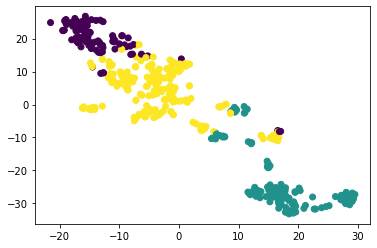

In [61]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)

plt.show()

In [62]:
#Вычислите средние значения price и CRIM в разных кластерах. X_test
print('Средние значения price:')
print('Кластер 0: {}'.format(y_train[labels_train == 0].mean()))
print('Кластер 1: {}'.format(y_train[labels_train == 1].mean()))
print('Кластер 2: {}'.format(y_train[labels_train == 2].mean()))
print('Средние значения CRIM:')
print('Кластер 0: {}'.format(X_train.loc[labels_train == 0, 'CRIM'].mean()))
print('Кластер 1: {}'.format(X_train.loc[labels_train == 1, 'CRIM'].mean()))
print('Кластер 2: {}'.format(X_train.loc[labels_train == 2, 'CRIM'].mean()))

Средние значения price:
Кластер 0: price    27.788372
dtype: float64
Кластер 1: price    16.165354
dtype: float64
Кластер 2: price    24.958115
dtype: float64
Средние значения CRIM:
Кластер 0: 0.07356558139534886
Кластер 1: 10.797028425196853
Кластер 2: 0.42166020942408367


**Задание 3**  
Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.  
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [59]:
labels_test = kmeans.predict(X_test_scaled)

In [63]:
print('Средние значения price:')
print('Кластер 0: {}'.format(y_test[labels_test == 0].mean()))
print('Кластер 1: {}'.format(y_test[labels_test == 1].mean()))
print('Кластер 2: {}'.format(y_test[labels_test == 2].mean()))
print('Средние значения CRIM:')
print('Кластер 0: {}'.format(X_test.loc[labels_test == 0, 'CRIM'].mean()))
print('Кластер 1: {}'.format(X_test.loc[labels_test == 1, 'CRIM'].mean()))
print('Кластер 2: {}'.format(X_test.loc[labels_test == 2, 'CRIM'].mean()))

Средние значения price:
Кластер 0: price    32.535714
dtype: float64
Кластер 1: price    16.710526
dtype: float64
Кластер 2: price    22.026
dtype: float64
Средние значения CRIM:
Кластер 0: 0.05019214285714285
Кластер 1: 9.419181842105264
Кластер 2: 0.23449939999999997
